In [1]:
import string
import sys
import re 
import matplotlib as mpl
import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd

from adjustText import adjust_text
from elasticsearch import Elasticsearch, helpers
from elasticsearch_dsl import Search, Q
from gensim.models import word2vec

In [2]:
def normalize(string):
        #"""Preprocessing punctuation marks
        string=string.replace("ሠ","ሰ")
        string=string.replace("ሃ", "ሀ")
        string=string.replace("ሐ", "ሀ")
        string=string.replace("ሓ", "ሀ")
        string=string.replace("ኅ", "ሀ")
        string=string.replace("ኃ", "ሀ")
        string=string.replace("ኋ", "ኋ")
        string=string.replace("ሗ", "ኋ")
        string=string.replace("ኁ", "ሁ")
        string=string.replace("ኅ", "ህ")
        string=string.replace("ኂ", "ሂ")
        string=string.replace("ኄ", "ሄ")
        string=string.replace("ኆ", "ሆ")
        string=string.replace("ሑ", "ሁ")
        string=string.replace("ሒ", "ሂ")
        string=string.replace("ሔ", "ሄ")
        string=string.replace("ሕ", "ህ")
        string=string.replace("ሡ", "ሱ")
        string=string.replace("ሖ", "ሆ")
        string=string.replace("ሢ", "ሲ")
        string=string.replace("ሣ", "ሳ")
        string=string.replace("ሤ", "ሴ")
        string=string.replace("ሥ", "ስ")
        string=string.replace("ሦ", "ሶ")
        string=string.replace("ሼ", "ሸ")
        string=string.replace("ቼ", "ቸ")
        string=string.replace("ዬ", "የ")
        string=string.replace("ዲ", "ድ")
        string=string.replace("ጄ", "ጀ")
        string=string.replace("ጸ", "ፀ")
        string=string.replace("ጹ", "ፁ")                    
        string=string.replace("ጺ", "ፂ")
        string=string.replace("ጻ", "ፃ")
        string=string.replace("ጼ", "ፄ")
        string=string.replace("ጽ", "ፅ")
        string=string.replace("ጾ", "ፆ")
        string=string.replace("ዉ", "ው")
        string=string.replace("ዴ", "ደ")
        string=string.replace("ቺ", "ች")
        string=string.replace("ዪ", "ይ")
        string=string.replace("ጪ", "ጭ")
        string=string.replace("ዓ", "አ")
        string=string.replace("ዑ", "ኡ")
        string=string.replace("ዒ", "ኢ")
        string=string.replace("ዐ", "አ")
        string=string.replace("ኣ", "አ")
        string=string.replace("ዔ", "ኤ")
        string=string.replace("ዕ", "እ")
        string=string.replace("ዖ", "ኦ")
        string=string.replace("ኚ", "ኝ")
        string=string.replace("ሺ", "ሽ")
        #punctuation="!<<“…/\@%&*.…._፦,.”?\\”"
        #for x in string:
        #    if str(x) in punctuation:
        #        string=string.replace(x,"")
                    
        return string


In [3]:
def sentence_tokenizer(s):
    #sents=re.compile('።!?፡፡').split(s)
    m=re.split(r"['።!?፡፡]",s)
    
    return m

def word_tokenizer(s):
    import re
    tokens = re.findall("[\w]+", s)

    return tokens

def preprocess(s):
    return [ w for w in str(s).split() ]
def remove_punc_and_special_chars(sentence_input): # puct in amh =፡።፤;፦፧፨፠፣ 
        normalized_text = re.sub(r'[\!\@\#\$\%\^\«\»\&\*\(\)\…\[\]\{\}\;\“\”\›\’\‘\"\'\:\,\.\‹\/\<\>\?\\\\|\`\´\~\-\=\+\፡\።\፤\;\፦\፥\፧\፨\፠\፣\፣\"\"]', '',sentence_input) 
        return normalized_text

In [46]:
text1=[]
sentens=[]
word=''
with open("zenaall.txt",encoding='utf-8') as file:
      text=file.read()

      s=sentence_tokenizer(text)
      for sent in s:
       # print(sent)
        #sentence_tokenizer(sent)
        remove_punc_and_special_chars(sent)
        #rbe=re.sub(r'\d{2}[/-]\d{2}[/-]\d{4}','', sent)
        res = re.sub(r'\d', '', sent)
        b=re.sub(r"/",'',res)
        remove_punc_and_special_chars(b)
        sentens.append(b)
        w=word_tokenizer(sent)
        for wor in w:
          wor1=word_tokenizer(str(wor))
          k=remove_punc_and_special_chars(str(wor1))
          u=normalize(k)
          if u not in text1:
             text1.append(u)
with open("normlize6.txt",'w',encoding='utf-8') as file:
  word1="\n".join([str(i)for i in sentens ])+"\n"
  file.write(word1)


In [4]:
def get_expanded_query_w2v(model, q0, k=3):
   
    qe = []
    tokenizer = RegexpTokenizer(r'\w+')
    query_token = tokenizer.tokenize(q0)
    for word in query_token:
        expanded_words = [pair[0] for pair in model.wv.most_similar(word)[:k]]
        expanded_words.append(word)
        qe.append(expanded_words)
    return qe


In [13]:
with open("normlize6.txt",encoding='utf-8') as file:
        stopwords= ['ነው','ላይ','ወደ' ,'እና','ስር' ,'ናቸው' ,'ውስጥ' ,'ሆነ' ,'ጋር', 'አቶ' ,'ቤት' ,'አም' ,'ደግሞ' , 'መሆኑን', 'ሲሆን', 'ነበር' ]
        text2=file.read()
        raw_sentences = text2.split('\n')
       
        sentences = []
        words=[]
        for sentence in raw_sentences:
            normalize(sentence)
            #sentenceremove_punc_and_special_chars(sentence)
            #if sentence not in sentences:
            sentences.append(sentence.split()) 
        for word in sentences:
            if  word  not in stopwords:
                if len(word)>2:
                    words.append(word)

In [14]:
word=[word for word in words if word]

In [19]:
stopwords= ['ነው','ላይ','ወደ' ,'እና','ስር' ,'ናቸው' ,'ውስጥ' ,'ሆነ' ,'ጋር', 'አቶ' ,'ቤት' ,'አም' ,'ደግሞ' , 'መሆኑን', 'ሲሆን', 'ነበር' ]
word1=[]
for wor in word:
    for we in wor:
        if  we not in stopwords:
            word1.append(wor)
len(word1)

225723

In [16]:
w2v_model = word2vec.Word2Vec(word1, window=5, min_count=5, compute_loss=True,workers=1)

In [20]:
training_loss = w2v_model.get_latest_training_loss()
print(training_loss)

14380540.0


In [22]:
emb_df = (
    pd.DataFrame(
        [w2v_model.wv.get_vector(str(n)) for n in w2v_model.wv.key_to_index],
        index = w2v_model.wv.key_to_index
    )
)
print(emb_df.shape)
emb_df.head()

(36295, 100)


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
ላይ,0.335538,-0.333088,3.057257,1.444559,-7.929892,-5.406643,-0.954927,1.486644,-4.808368,-3.126497,...,2.278251,0.222532,0.916295,1.858254,3.899480,-0.361458,-0.611356,-1.026761,-3.785629,-1.326400
ነው,-2.657378,-0.353000,-1.369226,1.991472,1.396392,-1.135315,1.843618,-1.352674,-2.835894,-3.697525,...,0.954033,0.883402,-1.900155,-3.527580,0.337800,-1.944489,2.034142,-0.482607,0.326163,0.613095
መሆኑን,-1.674627,-0.536252,-4.927155,-0.253205,0.099984,0.101294,-0.404713,-2.787907,-2.014559,-2.348991,...,0.176843,0.733138,1.776379,-1.526838,1.721558,-2.580462,-1.302433,2.641249,2.931693,-0.861601
ቴክኖሎጂ,-1.483726,0.941899,1.062234,1.485819,-3.627284,4.473442,-0.941392,-1.404223,1.299132,-0.408307,...,-4.388155,2.094541,2.260334,4.078636,3.529755,5.474466,-3.827312,1.314187,0.215698,-1.609599
ብለዋል,-2.905288,3.127589,-2.497850,1.931436,-0.524670,1.431848,-0.966218,-3.506471,-1.411256,-0.062206,...,0.035586,-0.958069,3.521479,-4.619480,-1.557519,-5.397670,2.864337,-1.303281,-0.261071,-2.201525


In [23]:
w2v_model.wv.most_similar('ምርጥ')

[('ዘር', 0.8061568737030029),
 ('የምርጥ', 0.7231376767158508),
 ('“ካገኘሁት', 0.6783792972564697),
 ('የአልጌ', 0.6752832531929016),
 ('“ምርጥ', 0.6699410080909729),
 ('የእንቁ', 0.6583956480026245),
 ('እያለሙ', 0.6553928256034851),
 ('ዘርተው', 0.6529733538627625),
 ('የሚዘራ', 0.6422377824783325),
 ('የዓመቱ', 0.6356155872344971)]

[]

<Figure size 1280x880 with 0 Axes>

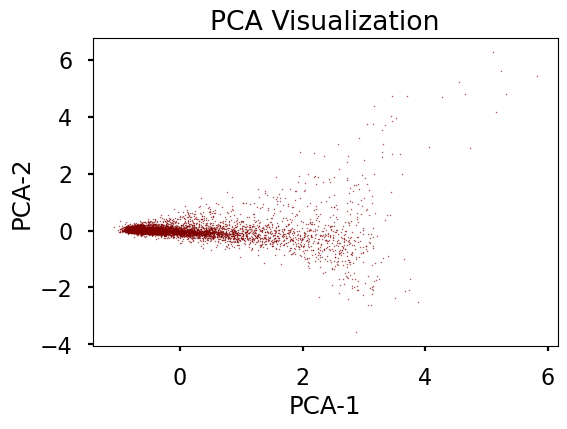

In [97]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=7)
pca_mdl = pca.fit_transform(emb_df)

emb_df_PCA = (
    pd.DataFrame(
        pca_mdl,
        columns=['x','y'],
        index = emb_df.index
    )
)

plt.clf()
fig = plt.figure(figsize=(6,4))

plt.scatter(
    x = emb_df_PCA['x'],
    y = emb_df_PCA['y'],
    s = 0.4,
    color = 'maroon',
    alpha = 0.5
)

plt.xlabel('PCA-1')
plt.ylabel('PCA-2')
plt.title('PCA Visualization')
plt.plot()

In [24]:
start_query = "ምርጥ  ሰብል"

In [25]:
from nltk.tokenize import RegexpTokenizer
qe_w2v = get_expanded_query_w2v(w2v_model, start_query, k=3)

In [26]:
qe_w2v

[['ዘር', 'የምርጥ', '“ካገኘሁት', 'ምርጥ'], ['የእንቁ', 'ዘርተው', 'ኩታ', 'ሰብል']]

In [27]:
import re
from nltk.tokenize import RegexpTokenizer
def query_expansion(query,k):
    tokenizer = RegexpTokenizer(r'\w+')
    query_token = tokenizer.tokenize(query)
    expanded_query = []
    for word in query_token:
        #most_similar_words = w2v_model.wv.most_similar(word, topn=3)
        expanded_words = [pair[0] for pair in w2v_model.wv.most_similar(word)[:k]]
        #expanded_words.append(word)
      
        expanded_query.append(expanded_words)
        #print(expanded_query)
       
    return expanded_query

In [28]:
expanded_query = query_expansion('ምርጥ የሰብል',3)
print(expanded_query)

[['ዘር', 'የምርጥ', '“ካገኘሁት'], ['ዝርያዎች', 'የሰብልና', 'የተሻሻሉ']]
